*Initially created at 15.01.2018 by Petteri Nevavuori (<petteri.nevavuori@mtech.fi>)*

---

# GDAL III. Field-Wise Yield Dataset Extraction
In this notebook we'll preprocess and create target datasets for field blocks into a folder structure as files. These files will then be accessed during the DB creation process to extract target values for distinct areas within field blocks.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Yield-Data-Preparation" data-toc-modified-id="1.-Yield-Data-Preparation-1">1. Yield Data Preparation</a></span><ul class="toc-item"><li><span><a href="#1.1-Filtering" data-toc-modified-id="1.1-Filtering-1.1">1.1 Filtering</a></span></li><li><span><a href="#1.2-Trimble-CFX-750" data-toc-modified-id="1.2-Trimble-CFX-750-1.2">1.2 Trimble CFX 750</a></span></li><li><span><a href="#1.3-John-Deere-GreenStar-1" data-toc-modified-id="1.3-John-Deere-GreenStar-1-1.3">1.3 John Deere GreenStar 1</a></span><ul class="toc-item"><li><span><a href="#Folder-structure" data-toc-modified-id="Folder-structure-1.3.1">Folder structure</a></span></li><li><span><a href="#Target-Crop-manipulation" data-toc-modified-id="Target-Crop-manipulation-1.3.2">Target Crop manipulation</a></span></li></ul></li><li><span><a href="#1.4-Exporting-yield-data" data-toc-modified-id="1.4-Exporting-yield-data-1.4">1.4 Exporting yield data</a></span></li><li><span><a href="#1.5-Removal-of-NULL-datapoints" data-toc-modified-id="1.5-Removal-of-NULL-datapoints-1.5">1.5 Removal of <code>NULL</code> datapoints</a></span></li><li><span><a href="#1.6-Grouping-field-wise-datasets" data-toc-modified-id="1.6-Grouping-field-wise-datasets-1.6">1.6 Grouping field-wise datasets</a></span></li></ul></li><li><span><a href="#2.-Rasterization-of-Shapefiles" data-toc-modified-id="2.-Rasterization-of-Shapefiles-2">2. Rasterization of Shapefiles</a></span><ul class="toc-item"><li><span><a href="#2.1-Assessment-of-interpolation-options" data-toc-modified-id="2.1-Assessment-of-interpolation-options-2.1">2.1 Assessment of interpolation options</a></span></li><li><span><a href="#2.2-Rasterization-of-all-datasets" data-toc-modified-id="2.2-Rasterization-of-all-datasets-2.2">2.2 Rasterization of all datasets</a></span></li><li><span><a href="#2.3-Correcting-the-coordinate-projection" data-toc-modified-id="2.3-Correcting-the-coordinate-projection-2.3">2.3 Correcting the coordinate projection</a></span></li><li><span><a href="#2.4-Extracting-block-shapes" data-toc-modified-id="2.4-Extracting-block-shapes-2.4">2.4 Extracting block shapes</a></span></li></ul></li></ul></div>

## 1. Yield Data Preparation

The first thing in the process of extracting the target yield datasets is to prepare the yield map datasets for extraction. Essentially this is manual labor for each particular dataset provided by distinct farmers with distinct yield mapping machines. We will address these datasets machine-wise and cover the possible obstacles we faced and the workarounds we found out.

We used the cheapest license for FarmWorks for loading, filtering and exporting the data. While not mandatory, it saved some time from having to manually configure all the machine-distinct drivers etc. The yield data was exported as shapefiles and the property `Mass_Yield` is used throughout.

### 1.1 Filtering

Every yield dataset will filtered to have only datapoints where the `Mass Yield` is between 1500 and 15000 kg/ha and harvester speed is between 2 and 7 km/h. This follows closely an article by Johannes Tiusanen.

### 1.2 Trimble CFX 750

The most crucial part is to select the correct Trimble product in FarmWorks during opening of jobs. Many products are able to open the coverage files, but only selecting the Trimble product CFX 750 is the software able to open the binary yield datapoints. Other than this, the process of opening the correct files requires viewing the tasks in the map and selecting only those having information related to harvesting, most notably the property `Mass_Yield`.

### 1.3 John Deere GreenStar 1

The yield data are provided in partially encrypted `.GSD`-files. There were two crucial factors to consider:

#### Folder structure

The yield files (`*.GSD`) *must* be in a folder named `pfdata`. Otherwise the data is unreadable by FarmWorks. Only this level is mandatory, as the `pfdata` can exists anywhere:

    ../pfdata/
        |-22928138.GSD
        |-22998732.GSD
        |-23082966.GSD
        |...

#### Target Crop manipulation



When loading the yield data files to FarmWorks, it can sometimes produce an error saying

    Error: 91
    Source: foTotals.AssignUnit::mpsUOMEngine
    Description: Object variable or With block variable not set
    
This has to do with the target crop of the yield data. For some reason this target crop is invalid. To replace is, it is necessary to manually edit the partially encoded `.GSD`-files. To manipulate them, they need to opened in a text editor. As an example we will change the target crop *Barley (Spr)* to just *Barley*. Then the following steps need to be taken after opening the corresponding file in a text editor.:

 1. Find row with text `TgtCrop` and replace 33 (for *Barley (Spr)*) with 2 (*Barley*).
 2. Find row with text RateID 1 and replace 33 with 2.
 3. Find row with text RateID 2 and replace 33 with 2.
 4. Find row with text Conditions and replace 33 with 2.
 
The files should now be readable. These same places hold for every manipulation an we had to them for target crops 33 and 47. Note however that to find the file with problems the files should be opened one at a time. The number codes for most crops are the following:

Use these | These can exists too
:--- | :---
1 Alfalfa | 33 Barley Spr
2 Barley | 34 Barley Wtr
3 Edible Beans | 35 Barley Euro 6
4 Navy Beans | 36 Corn Euro
5 Canola | 37 Oats Euro
6 Corn | 38 Peas Euro
7 Flax | 39 Popcorn Euro
8 Grass seeds | 40 Rape seed E Ind
9 Lentils | 41 Rye Euro
10 Millet | 42 Sunflower E Ind
11 Mustard | 43 Sunflower E Oil
12 Oats | 44 Triticale Euro
13 Peas | 45 Wheat Euro feed
14 Peas Field | 46 Wheat Euro Wtr
15 Popcorn yellow | 47 Rape Seed E Oil
16 Popcorn white | 48 -
17 Rape seed |
18 Rice long |
19 Rice medium |
20 Rye |


### 1.4 Exporting yield data

For each farm then the yield datasets are loaded to FarmWorks and exported as shapefiles to a single corresponding folder. This is to prepare for mass rasterization of vector files with `gdal.Grid` utility. After exports the fields are manually inspected and field-wise datapoints clearly separate from the larger mass of datapoints are removed to enhance rasterization quality. These points would be removed in any case after raster clipping post-rasterization.

### 1.5 Removal of `NULL` datapoints

For some reason the exporting of yield datasets as shapefiles from FarmWorks also introduces datapoints with `NULL` values. We will therefore go through every exported shapefile and and remove any points containing no useful data for the attribute `Mass_Yield`.

In [1]:
from field_analysis.extraction import yields

yields.drop_null_points()

Processing
	Default_Client_Default_Farm_ravani_Harvesting_20170921.shp - Done in 0 m 7 s
	ilkka_mattila_sunniemen_kartano_Ahonmaa_Harvesting_20170924.shp - Done in 0 m 8 s
	ilkka_mattila_sunniemen_kartano_Alapelto_Harvesting_20170925.shp - Done in 0 m 18 s
	ilkka_mattila_sunniemen_kartano_Alatuori_11_ha_Harvesting_20170905.shp - Done in 0 m 8 s
	ilkka_mattila_sunniemen_kartano_Alatuori_9_h_Harvesting_20170911.shp - Done in 0 m 8 s
	ilkka_mattila_sunniemen_kartano_Alatuori_Harvesting_merged.shp - Done in 0 m 15 s
	ilkka_mattila_sunniemen_kartano_Eroia_Harvesting_merged.shp - Done in 0 m 20 s
	ilkka_mattila_sunniemen_kartano_Etupelto_Harvesting_20170930.shp - Done in 0 m 2 s
	ilkka_mattila_sunniemen_kartano_Heinikangas_Harvesting_20170915.shp - Done in 0 m 2 s
	ilkka_mattila_sunniemen_kartano_Hormisto_1_ha_Harvesting_20170921.shp - Done in 0 m 1 s
	ilkka_mattila_sunniemen_kartano_Hormisto_Harvesting_20170921.shp - Done in 0 m 3 s
	ilkka_mattila_sunniemen_kartano_Hormisto__kolmio_Harvesti

### 1.6 Grouping field-wise datasets

After having all the yield datasets extracted as shapefiles, the next task is to merge shapefiles corresponding to distinct fields. This is manually done by looking at each shapefile and also necessary for correct rasterization. In the case where a field's yield data is dispersed across multiple shapefiles, there will be multiple rasters generated for that field that are hard to join together. It is easier to do the joining with point data. The joiining will done in QGIS for the ease of it.

## 2. Rasterization of Shapefiles

The next step is then to transform shapefile datasets consisting of single points to image rasters through mean sof interpolation. As mentioned above, a tool called `gdal.Grid` is a perfect match for this process. There exists multiple options for interpolation algorithms and we will go through them first, assessing the most suitable option. Then we will process each yield dataset and save the rasters to a distinct location.

### 2.1 Assessment of interpolation options

The `gdal.Grid` offers the following interpolation options documented more in-depth [here](http://www.gdal.org/gdal_grid.html):

- invdist: Inverse distance to a power. This is default algorithm.
- invdistnn: Inverse distance to a power with nearest neighbor searching.
- average: Moving average algorithm.
- nearest: Nearest neighbor algorithm.
- linear: Linear interpolation algorithm.

We tested the *average* with QGIS initially and the results were totally unusable as the method only produces a mean over every point. We will choose a single yield dataset and assess the output of the rasterization tool visually.

invdist:power=1.0 - Done in 0 m 6 s
invdist:power=2.0 - Done in 0 m 1 s
invdist:power=4.0 - Done in 0 m 6 s
invdistnn:power=1.0 - Done in 1 m 15 s
invdistnn:power=2.0 - Done in 1 m 5 s
invdistnn:power=4.0 - Done in 1 m 8 s
nearest:radius2=0.0:radius1=0.0 - Done in 0 m 0 s
nearest:radius2=1.0:radius1=1.0 - Done in 0 m 5 s
nearest:radius2=10.0:radius1=10.0 - Done in 0 m 5 s


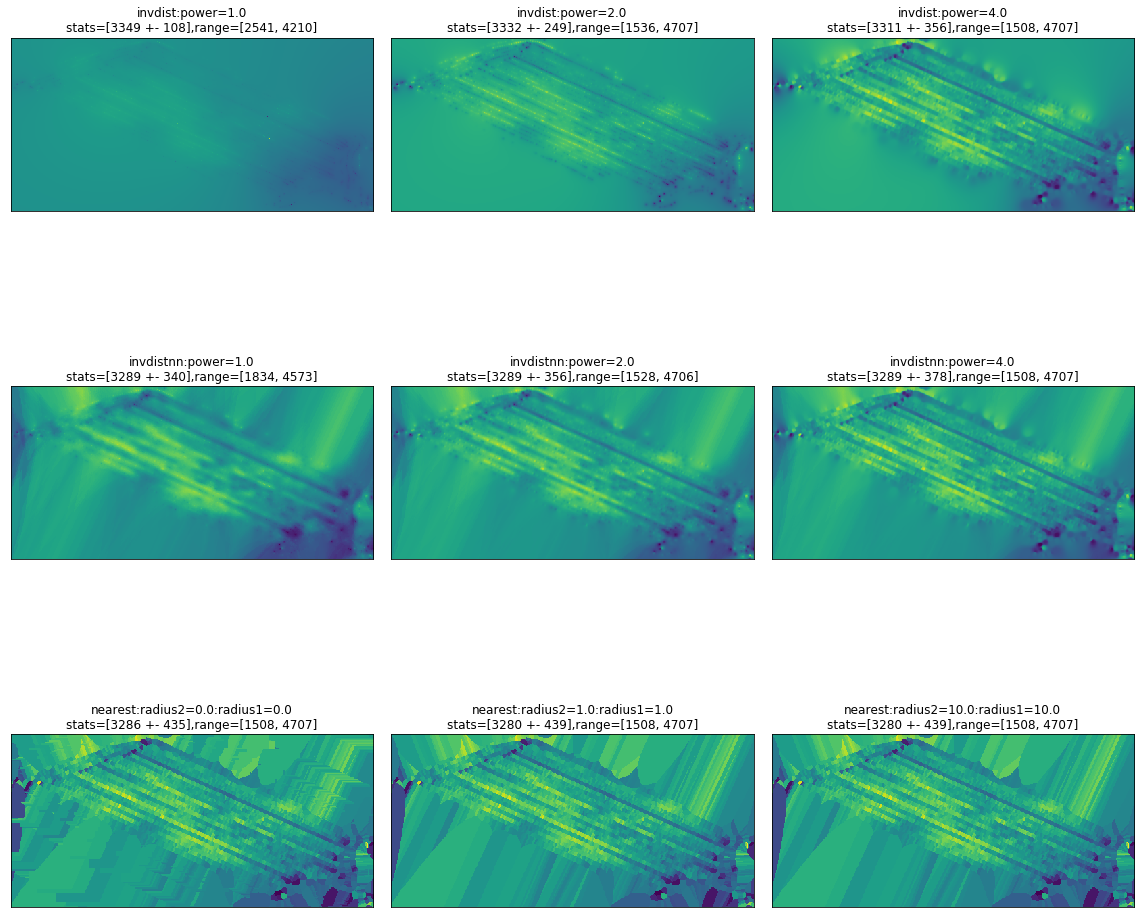

In [3]:
import os
import time
import matplotlib.pyplot as plt
from osgeo import gdal, ogr

from field_analysis import settings

plt.rcParams['figure.figsize'] = 16,16

test_shape_path = os.path.join(settings.YIELD_SHAPES_DIR,'ilkka_mattila_sunniemen_kartano_Isoniitty_Harvesting_20170904.shp')
short_side = 256

shape = ogr.Open(test_shape_path)
layer_name = shape.GetLayer(0).GetName()
x_min,x_max,y_min,y_max = shape.GetLayer(0).GetExtent()
shape = None

x_to_y = (x_max-x_min)/(y_max-y_min)
x_ratio = max(1,x_to_y)
y_ratio = min(1,x_to_y)

algs = {
    'invdist':[{'power':1.0,}, {'power':2.0,}, {'power':4.0,}],
    'invdistnn':[{'power':1.0,}, {'power':2.0,}, {'power':4.0,}],
    'nearest':[{'radius1':0.0,'radius2':0.0}, 
               {'radius1':1.0,'radius2':1.0}, 
               {'radius1':10.0,'radius2':10.0}]
}

i = 1
for alg, confs in algs.items():

    for j, conf in enumerate(confs):
        
        start = time.time()
        
        conf_list = ["{}={}".format(k,float(v)) for k,v in conf.items()]
        alg_string = ":".join([alg]+conf_list)
        target_path = os.path.join(settings.YIELD_RASTERS_DIR,'algtest_{}{}.tif'.format(alg,j))
        
        try:
            raster = gdal.Grid(destName=target_path, srcDS=test_shape_path, format='GTiff', 
                               width=short_side*x_ratio, height=short_side/y_ratio,
                               zfield='Mass_Yield', layers=[layer_name], algorithm=alg_string)
            arr = raster.ReadAsArray()

            plt.subplot(330+i)
            plt.imshow(arr)
            plt.title("{}\nstats=[{:.0f} +- {:.0f}],range=[{:.0f}, {:.0f}]".format(
                alg_string,arr.mean(),arr.std(),arr.min(),arr.max()))
            plt.xticks([])
            plt.yticks([])

        finally:
            raster = None
            i += 1
            
        delta = time.time() - start
        print("{} - Done in {:.0f} m {:.0f} s".format(alg_string, delta // 60, delta % 60))
        
plt.tight_layout()       
plt.show()

While the product of *invdistnn* is the smoothest with distinguishable patterns, the processing time is overly long for a single image. *Invdist* is fast, but the interpolation is a bit too focused on the distinct datapoints with too steep decrease between datapoints. The *linear* is very fast, but tends to lose the intricacies of the data visible in other produced images. While *nearest* is fast, it is a bit too rough when compared to *invdist* and *invdistnn*.

After weighing the options, the use of a faster algorithm overweighs the distributed smoothness of *invdistnn*. While the *nearest* operates in similar principle to *invdistnn*, it still a bit too coarse. Thus we will use the *invdist*.

### 2.2 Rasterization of all datasets

We will then use this knowledge to rasterize every dataset.

Processing
	From	D:\Data\Yields\2017\Shapefiles\Default_Client_Default_Farm_ravani_Harvesting_20170921.shp
	To	D:\Data\Yields\2017\Rasters\grid_000.tif
		Done in 1 m 33 s


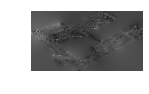

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Ahonmaa_Harvesting_20170924.shp
	To	D:\Data\Yields\2017\Rasters\grid_001.tif
		Done in 1 m 44 s


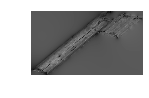

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Alapelto_Harvesting_20170925.shp
	To	D:\Data\Yields\2017\Rasters\grid_002.tif
		Done in 4 m 38 s


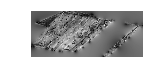

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Alatuori_11_ha_Harvesting_20170905.shp
	To	D:\Data\Yields\2017\Rasters\grid_003.tif
		Done in 2 m 2 s


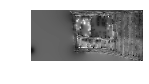

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Alatuori_9_h_Harvesting_20170911.shp
	To	D:\Data\Yields\2017\Rasters\grid_004.tif
		Done in 2 m 23 s


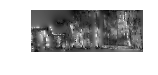

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Alatuori_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_005.tif
		Done in 6 m 36 s


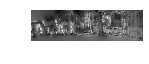

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Eroia_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_006.tif
		Done in 3 m 38 s


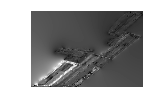

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Etupelto_Harvesting_20170930.shp
	To	D:\Data\Yields\2017\Rasters\grid_007.tif
		Done in 0 m 43 s


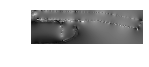

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Heinikangas_Harvesting_20170915.shp
	To	D:\Data\Yields\2017\Rasters\grid_008.tif
		Done in 0 m 17 s


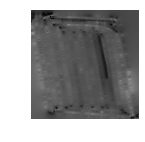

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Hormisto_1_ha_Harvesting_20170921.shp
	To	D:\Data\Yields\2017\Rasters\grid_009.tif
		Done in 0 m 19 s


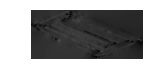

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Hormisto_Harvesting_20170921.shp
	To	D:\Data\Yields\2017\Rasters\grid_010.tif
		Done in 1 m 6 s


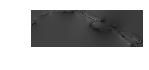

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Hormisto__kolmio_Harvesting_20170921.shp
	To	D:\Data\Yields\2017\Rasters\grid_011.tif
		Done in 0 m 54 s


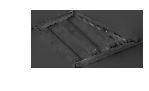

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Isoniitty_Harvesting_20170904.shp
	To	D:\Data\Yields\2017\Rasters\grid_012.tif
		Done in 0 m 44 s


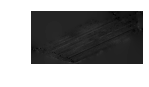

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Isosavikko_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_013.tif
		Done in 2 m 49 s


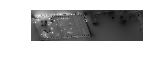

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Kaupungin_suo_Harvesting_20170928.shp
	To	D:\Data\Yields\2017\Rasters\grid_014.tif
		Done in 1 m 8 s


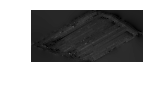

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Kiljuuli__0ma_Harvesting_20170905.shp
	To	D:\Data\Yields\2017\Rasters\grid_015.tif
		Done in 9 m 22 s


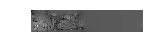

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Kotipelto_1_2_Harvesting_20170925.shp
	To	D:\Data\Yields\2017\Rasters\grid_016.tif
		Done in 0 m 31 s


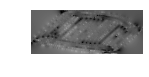

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Kreula_Harvesting_20170928.shp
	To	D:\Data\Yields\2017\Rasters\grid_017.tif
		Done in 0 m 35 s


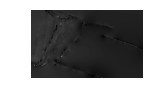

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Lahdenranta_Harvesting_20170926.shp
	To	D:\Data\Yields\2017\Rasters\grid_018.tif
		Done in 0 m 42 s


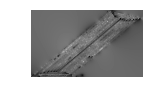

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_lehikoisentie_Harvesting_20170904.shp
	To	D:\Data\Yields\2017\Rasters\grid_019.tif
		Done in 0 m 25 s


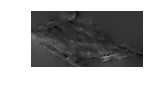

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_lehtivainio_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_020.tif
		Done in 0 m 5 s


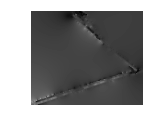

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Lekunlohko_Harvesting_20170915.shp
	To	D:\Data\Yields\2017\Rasters\grid_021.tif
		Done in 2 m 5 s


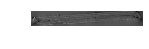

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Makipelto_Harvesting_20170925.shp
	To	D:\Data\Yields\2017\Rasters\grid_022.tif
		Done in 1 m 22 s


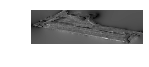

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Mikan__Lassen_ym_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_023.tif
		Done in 0 m 27 s


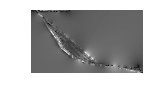

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_ojakulma_Harvesting_20170904.shp
	To	D:\Data\Yields\2017\Rasters\grid_024.tif
		Done in 0 m 42 s


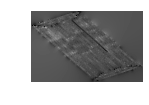

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Onnela_Harvesting_20170923.shp
	To	D:\Data\Yields\2017\Rasters\grid_025.tif
		Done in 0 m 30 s


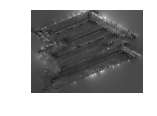

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Pajalohko_Harvesting_20170930.shp
	To	D:\Data\Yields\2017\Rasters\grid_026.tif
		Done in 1 m 34 s


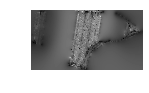

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Peltosalo_3_5[kari_2_7_haPLUS]_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_027.tif
		Done in 0 m 31 s


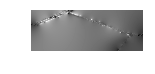

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_PENTINMAA_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_028.tif
		Done in 1 m 56 s


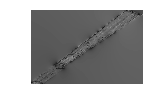

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_protso_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_029.tif
		Done in 0 m 23 s


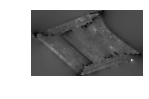

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Rantalohko_Harvesting_20170911.shp
	To	D:\Data\Yields\2017\Rasters\grid_030.tif
		Done in 1 m 41 s


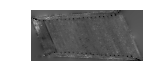

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Roihupaion_auke_Harvesting_20170928.shp
	To	D:\Data\Yields\2017\Rasters\grid_031.tif
		Done in 0 m 14 s


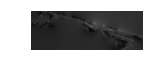

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Salovaara_Harvesting_20170923.shp
	To	D:\Data\Yields\2017\Rasters\grid_032.tif
		Done in 0 m 56 s


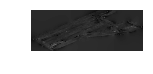

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Sarkaplto_Harvesting_20170929.shp
	To	D:\Data\Yields\2017\Rasters\grid_033.tif
		Done in 1 m 23 s


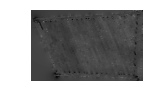

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Sippolan_suo_Harvesting_20170928.shp
	To	D:\Data\Yields\2017\Rasters\grid_034.tif
		Done in 0 m 41 s


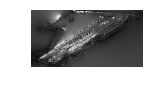

	From	D:\Data\Yields\2017\Shapefiles\ilkka_mattila_sunniemen_kartano_Tienvieru_Harvesting_20170904.shp
	To	D:\Data\Yields\2017\Rasters\grid_035.tif
		Done in 1 m 43 s


	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_jokipelto_Harvesting_20170930.shp
	To	D:\Data\Yields\2017\Rasters\grid_036.tif
		Done in 1 m 4 s


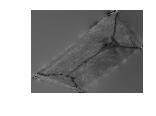

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_kotopelto_Harvesting_20170911.shp
	To	D:\Data\Yields\2017\Rasters\grid_037.tif
		Done in 2 m 16 s


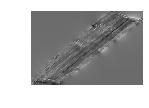

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_kotosuulinpelto_Harvesting_20171002.shp
	To	D:\Data\Yields\2017\Rasters\grid_038.tif
		Done in 3 m 10 s


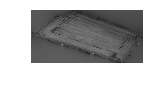

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_laineenpelto_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_039.tif
		Done in 1 m 59 s


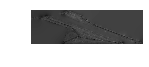

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_luodonpelto_Harvesting_20170925.shp
	To	D:\Data\Yields\2017\Rasters\grid_040.tif
		Done in 0 m 35 s


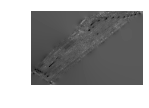

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_polttosuuli_Harvesting_20170902.shp
	To	D:\Data\Yields\2017\Rasters\grid_041.tif
		Done in 0 m 48 s


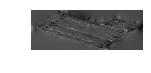

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_riihipelto_Harvesting_20170902.shp
	To	D:\Data\Yields\2017\Rasters\grid_042.tif
		Done in 0 m 59 s


	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_saikka_Harvesting_20170913.shp
	To	D:\Data\Yields\2017\Rasters\grid_043.tif
		Done in 0 m 14 s


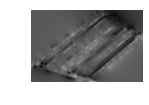

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_salttinki_Harvesting_20170903.shp
	To	D:\Data\Yields\2017\Rasters\grid_044.tif
		Done in 3 m 42 s


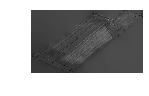

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_samin_kotipelto_Harvesting_20171001.shp
	To	D:\Data\Yields\2017\Rasters\grid_045.tif
		Done in 1 m 10 s


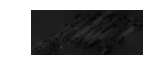

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_sonnisuuli_Harvesting_20171020.shp
	To	D:\Data\Yields\2017\Rasters\grid_046.tif
		Done in 3 m 59 s


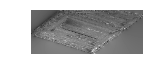

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_trekolinnokka_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_047.tif
		Done in 1 m 2 s


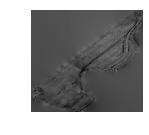

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_vanhaviiki_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_048.tif
		Done in 3 m 4 s


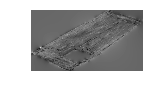

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_viikijokiranta_Harvesting_20170925.shp
	To	D:\Data\Yields\2017\Rasters\grid_049.tif
		Done in 0 m 37 s


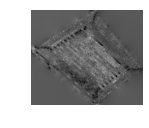

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_viikinpelo_Harvesting_20170926.shp
	To	D:\Data\Yields\2017\Rasters\grid_050.tif
		Done in 1 m 21 s


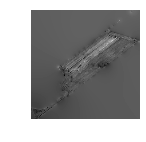

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_viiki_Harvesting_20170923.shp
	To	D:\Data\Yields\2017\Rasters\grid_051.tif
		Done in 3 m 22 s


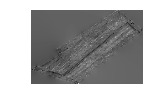

	From	D:\Data\Yields\2017\Shapefiles\lauri_vanhakartano_savola_viljasenpelto_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_052.tif
		Done in 2 m 43 s


	From	D:\Data\Yields\2017\Shapefiles\lauri_vnhakartano_savola_koulupelto_Harvesting_20171002.shp
	To	D:\Data\Yields\2017\Rasters\grid_053.tif
		Done in 3 m 25 s


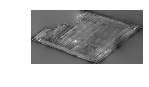

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_18_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_054.tif
		Done in 3 m 25 s


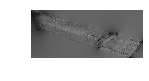

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_21_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_055.tif
		Done in 2 m 18 s


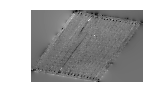

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_23_Harvesting_20170921.shp
	To	D:\Data\Yields\2017\Rasters\grid_056.tif
		Done in 1 m 5 s


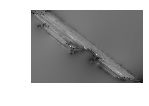

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_24_Harvesting_20170922.shp
	To	D:\Data\Yields\2017\Rasters\grid_057.tif
		Done in 0 m 57 s


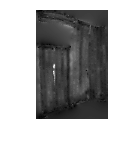

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_25_Harvesting_20170915.shp
	To	D:\Data\Yields\2017\Rasters\grid_058.tif
		Done in 1 m 4 s


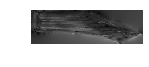

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_5_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_059.tif
		Done in 4 m 2 s


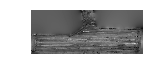

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_1_7_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_060.tif
		Done in 3 m 6 s


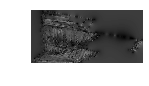

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_UnknownFarm_METSASUULIVAINIO_Harvesting_20171018.shp
	To	D:\Data\Yields\2017\Rasters\grid_061.tif
		Done in 1 m 12 s


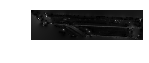

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_UnknownFarm_POHJAVAINIO_Harvesting_20171015.shp
	To	D:\Data\Yields\2017\Rasters\grid_062.tif
		Done in 2 m 37 s


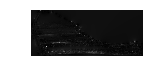

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_UnknownFarm_RANTA_Harvesting_20170919.shp
	To	D:\Data\Yields\2017\Rasters\grid_063.tif
		Done in 8 m 51 s


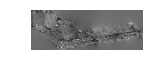

	From	D:\Data\Yields\2017\Shapefiles\UnknownClient_UnknownFarm_TAPPURISUULIVAINIO_Harvesting_merged.shp
	To	D:\Data\Yields\2017\Rasters\grid_064.tif
		Done in 4 m 35 s


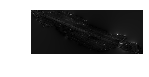

Processing done in 127 m 13 s


In [2]:
from field_analysis.extraction import yields

yields.rasterize_shapefiles(algorithm='invdist:power=3.0',short_side=768)

### 2.3 Correcting the coordinate projection

Next step is to assess the production of images in correct coordinate system. The coordinate system used in Maaseutuvirasto-provided block shapefiles is TM35FIN or EPSG:3067. The coordinate system in the yield files in the other hand is degrees-minutes-seconds, which essentially is an unprojected geographic coordinate system  WGS 84 or EPSG:4326. We will use `gdal.Warp` to reproject the rasters with appropriate resolution of 10/32 m/px as is the case with drone images.

Processing
	From	D:\Data\Yields\2017\Rasters\grid_000.tif
	To	D:\Data\Yields\2017\Rasters\warp_000.tif
	Done in 0 m 0 s


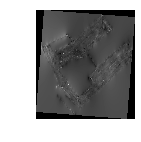

	From	D:\Data\Yields\2017\Rasters\grid_001.tif
	To	D:\Data\Yields\2017\Rasters\warp_001.tif
	Done in 0 m 0 s


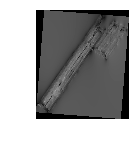

	From	D:\Data\Yields\2017\Rasters\grid_002.tif
	To	D:\Data\Yields\2017\Rasters\warp_002.tif
	Done in 0 m 0 s


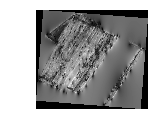

	From	D:\Data\Yields\2017\Rasters\grid_003.tif
	To	D:\Data\Yields\2017\Rasters\warp_003.tif
	Done in 0 m 0 s


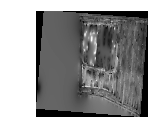

	From	D:\Data\Yields\2017\Rasters\grid_004.tif
	To	D:\Data\Yields\2017\Rasters\warp_004.tif
	Done in 0 m 0 s


	From	D:\Data\Yields\2017\Rasters\grid_005.tif
	To	D:\Data\Yields\2017\Rasters\warp_005.tif
	Done in 0 m 0 s


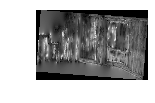

	From	D:\Data\Yields\2017\Rasters\grid_006.tif
	To	D:\Data\Yields\2017\Rasters\warp_006.tif
	Done in 0 m 0 s


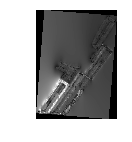

	From	D:\Data\Yields\2017\Rasters\grid_007.tif
	To	D:\Data\Yields\2017\Rasters\warp_007.tif
	Done in 0 m 0 s


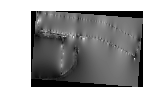

	From	D:\Data\Yields\2017\Rasters\grid_008.tif
	To	D:\Data\Yields\2017\Rasters\warp_008.tif
	Done in 0 m 0 s


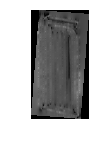

	From	D:\Data\Yields\2017\Rasters\grid_009.tif
	To	D:\Data\Yields\2017\Rasters\warp_009.tif
	Done in 0 m 0 s


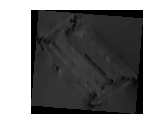

	From	D:\Data\Yields\2017\Rasters\grid_010.tif
	To	D:\Data\Yields\2017\Rasters\warp_010.tif
	Done in 0 m 0 s


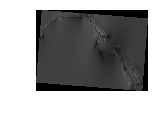

	From	D:\Data\Yields\2017\Rasters\grid_011.tif
	To	D:\Data\Yields\2017\Rasters\warp_011.tif
	Done in 0 m 0 s


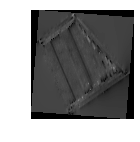

	From	D:\Data\Yields\2017\Rasters\grid_012.tif
	To	D:\Data\Yields\2017\Rasters\warp_012.tif
	Done in 0 m 0 s


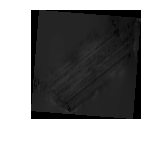

	From	D:\Data\Yields\2017\Rasters\grid_013.tif
	To	D:\Data\Yields\2017\Rasters\warp_013.tif
	Done in 0 m 0 s


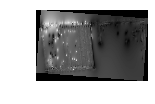

	From	D:\Data\Yields\2017\Rasters\grid_014.tif
	To	D:\Data\Yields\2017\Rasters\warp_014.tif
	Done in 0 m 0 s


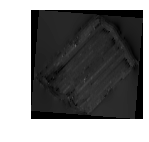

	From	D:\Data\Yields\2017\Rasters\grid_015.tif
	To	D:\Data\Yields\2017\Rasters\warp_015.tif
	Done in 0 m 0 s


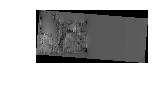

	From	D:\Data\Yields\2017\Rasters\grid_016.tif
	To	D:\Data\Yields\2017\Rasters\warp_016.tif
	Done in 0 m 0 s


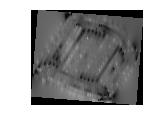

	From	D:\Data\Yields\2017\Rasters\grid_017.tif
	To	D:\Data\Yields\2017\Rasters\warp_017.tif
	Done in 0 m 0 s


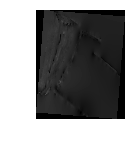

	From	D:\Data\Yields\2017\Rasters\grid_018.tif
	To	D:\Data\Yields\2017\Rasters\warp_018.tif
	Done in 0 m 0 s


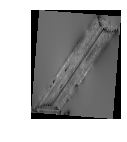

	From	D:\Data\Yields\2017\Rasters\grid_019.tif
	To	D:\Data\Yields\2017\Rasters\warp_019.tif
	Done in 0 m 0 s


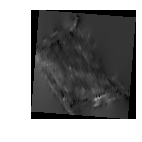

	From	D:\Data\Yields\2017\Rasters\grid_020.tif
	To	D:\Data\Yields\2017\Rasters\warp_020.tif
	Done in 0 m 0 s


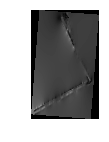

	From	D:\Data\Yields\2017\Rasters\grid_021.tif
	To	D:\Data\Yields\2017\Rasters\warp_021.tif
	Done in 0 m 0 s


	From	D:\Data\Yields\2017\Rasters\grid_022.tif
	To	D:\Data\Yields\2017\Rasters\warp_022.tif
	Done in 0 m 0 s


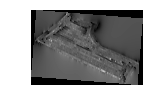

	From	D:\Data\Yields\2017\Rasters\grid_023.tif
	To	D:\Data\Yields\2017\Rasters\warp_023.tif
	Done in 0 m 0 s


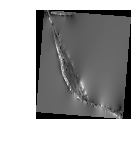

	From	D:\Data\Yields\2017\Rasters\grid_024.tif
	To	D:\Data\Yields\2017\Rasters\warp_024.tif
	Done in 0 m 0 s


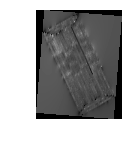

	From	D:\Data\Yields\2017\Rasters\grid_025.tif
	To	D:\Data\Yields\2017\Rasters\warp_025.tif
	Done in 0 m 0 s


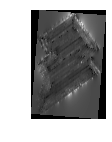

	From	D:\Data\Yields\2017\Rasters\grid_026.tif
	To	D:\Data\Yields\2017\Rasters\warp_026.tif
	Done in 0 m 0 s


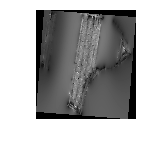

	From	D:\Data\Yields\2017\Rasters\grid_027.tif
	To	D:\Data\Yields\2017\Rasters\warp_027.tif
	Done in 0 m 0 s


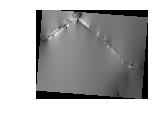

	From	D:\Data\Yields\2017\Rasters\grid_028.tif
	To	D:\Data\Yields\2017\Rasters\warp_028.tif
	Done in 0 m 0 s


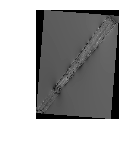

	From	D:\Data\Yields\2017\Rasters\grid_029.tif
	To	D:\Data\Yields\2017\Rasters\warp_029.tif
	Done in 0 m 0 s


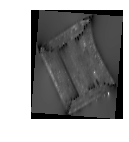

	From	D:\Data\Yields\2017\Rasters\grid_030.tif
	To	D:\Data\Yields\2017\Rasters\warp_030.tif
	Done in 0 m 0 s


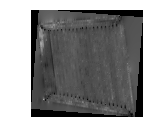

	From	D:\Data\Yields\2017\Rasters\grid_031.tif
	To	D:\Data\Yields\2017\Rasters\warp_031.tif
	Done in 0 m 0 s


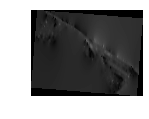

	From	D:\Data\Yields\2017\Rasters\grid_032.tif
	To	D:\Data\Yields\2017\Rasters\warp_032.tif
	Done in 0 m 0 s


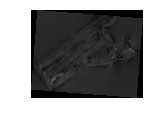

	From	D:\Data\Yields\2017\Rasters\grid_033.tif
	To	D:\Data\Yields\2017\Rasters\warp_033.tif
	Done in 0 m 0 s


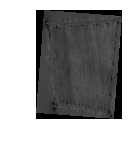

	From	D:\Data\Yields\2017\Rasters\grid_034.tif
	To	D:\Data\Yields\2017\Rasters\warp_034.tif
	Done in 0 m 0 s


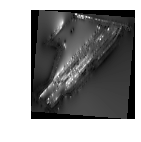

	From	D:\Data\Yields\2017\Rasters\grid_035.tif
	To	D:\Data\Yields\2017\Rasters\warp_035.tif
	Done in 0 m 0 s


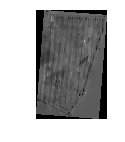

	From	D:\Data\Yields\2017\Rasters\grid_036.tif
	To	D:\Data\Yields\2017\Rasters\warp_036.tif
	Done in 0 m 0 s


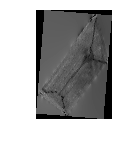

	From	D:\Data\Yields\2017\Rasters\grid_037.tif
	To	D:\Data\Yields\2017\Rasters\warp_037.tif
	Done in 0 m 0 s


	From	D:\Data\Yields\2017\Rasters\grid_038.tif
	To	D:\Data\Yields\2017\Rasters\warp_038.tif
	Done in 0 m 0 s


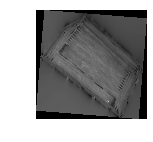

	From	D:\Data\Yields\2017\Rasters\grid_039.tif
	To	D:\Data\Yields\2017\Rasters\warp_039.tif
	Done in 0 m 0 s


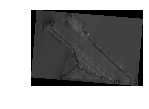

	From	D:\Data\Yields\2017\Rasters\grid_040.tif
	To	D:\Data\Yields\2017\Rasters\warp_040.tif
	Done in 0 m 0 s


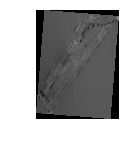

	From	D:\Data\Yields\2017\Rasters\grid_041.tif
	To	D:\Data\Yields\2017\Rasters\warp_041.tif
	Done in 0 m 0 s


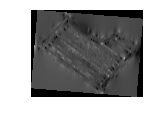

	From	D:\Data\Yields\2017\Rasters\grid_042.tif
	To	D:\Data\Yields\2017\Rasters\warp_042.tif
	Done in 0 m 0 s


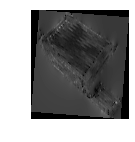

	From	D:\Data\Yields\2017\Rasters\grid_043.tif
	To	D:\Data\Yields\2017\Rasters\warp_043.tif
	Done in 0 m 0 s


	From	D:\Data\Yields\2017\Rasters\grid_044.tif
	To	D:\Data\Yields\2017\Rasters\warp_044.tif
	Done in 0 m 0 s


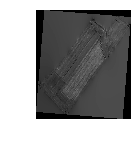

	From	D:\Data\Yields\2017\Rasters\grid_045.tif
	To	D:\Data\Yields\2017\Rasters\warp_045.tif
	Done in 0 m 0 s


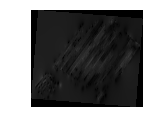

	From	D:\Data\Yields\2017\Rasters\grid_046.tif
	To	D:\Data\Yields\2017\Rasters\warp_046.tif
	Done in 0 m 0 s


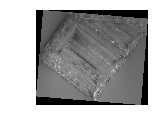

	From	D:\Data\Yields\2017\Rasters\grid_047.tif
	To	D:\Data\Yields\2017\Rasters\warp_047.tif
	Done in 0 m 0 s


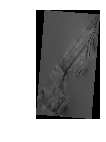

	From	D:\Data\Yields\2017\Rasters\grid_048.tif
	To	D:\Data\Yields\2017\Rasters\warp_048.tif
	Done in 0 m 0 s


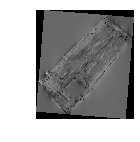

	From	D:\Data\Yields\2017\Rasters\grid_049.tif
	To	D:\Data\Yields\2017\Rasters\warp_049.tif
	Done in 0 m 0 s


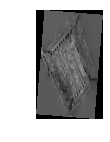

	From	D:\Data\Yields\2017\Rasters\grid_050.tif
	To	D:\Data\Yields\2017\Rasters\warp_050.tif
	Done in 0 m 0 s


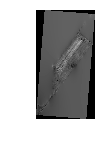

	From	D:\Data\Yields\2017\Rasters\grid_051.tif
	To	D:\Data\Yields\2017\Rasters\warp_051.tif
	Done in 0 m 0 s


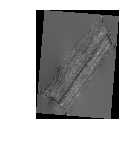

	From	D:\Data\Yields\2017\Rasters\grid_052.tif
	To	D:\Data\Yields\2017\Rasters\warp_052.tif
	Done in 0 m 0 s


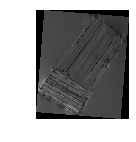

	From	D:\Data\Yields\2017\Rasters\grid_053.tif
	To	D:\Data\Yields\2017\Rasters\warp_053.tif
	Done in 0 m 0 s


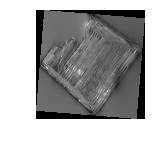

	From	D:\Data\Yields\2017\Rasters\grid_054.tif
	To	D:\Data\Yields\2017\Rasters\warp_054.tif
	Done in 0 m 0 s


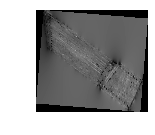

	From	D:\Data\Yields\2017\Rasters\grid_055.tif
	To	D:\Data\Yields\2017\Rasters\warp_055.tif
	Done in 0 m 0 s


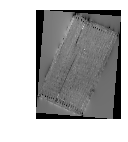

	From	D:\Data\Yields\2017\Rasters\grid_056.tif
	To	D:\Data\Yields\2017\Rasters\warp_056.tif
	Done in 0 m 0 s


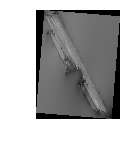

	From	D:\Data\Yields\2017\Rasters\grid_057.tif
	To	D:\Data\Yields\2017\Rasters\warp_057.tif
	Done in 0 m 0 s


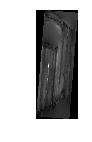

	From	D:\Data\Yields\2017\Rasters\grid_058.tif
	To	D:\Data\Yields\2017\Rasters\warp_058.tif
	Done in 0 m 0 s


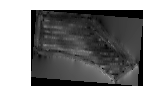

	From	D:\Data\Yields\2017\Rasters\grid_059.tif
	To	D:\Data\Yields\2017\Rasters\warp_059.tif
	Done in 0 m 0 s


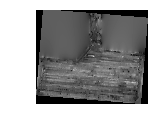

	From	D:\Data\Yields\2017\Rasters\grid_060.tif
	To	D:\Data\Yields\2017\Rasters\warp_060.tif
	Done in 0 m 0 s


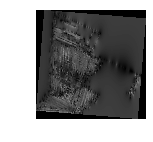

	From	D:\Data\Yields\2017\Rasters\grid_061.tif
	To	D:\Data\Yields\2017\Rasters\warp_061.tif
	Done in 0 m 0 s


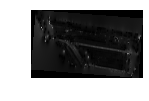

	From	D:\Data\Yields\2017\Rasters\grid_062.tif
	To	D:\Data\Yields\2017\Rasters\warp_062.tif
	Done in 0 m 0 s


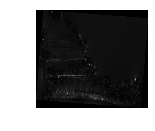

	From	D:\Data\Yields\2017\Rasters\grid_063.tif
	To	D:\Data\Yields\2017\Rasters\warp_063.tif
	Done in 0 m 0 s


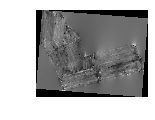

	From	D:\Data\Yields\2017\Rasters\grid_064.tif
	To	D:\Data\Yields\2017\Rasters\warp_064.tif
	Done in 0 m 0 s


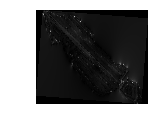

Processing done in 0 m 18 s


In [3]:
from field_analysis.extraction import yields

yields.reproject(source_srs='EPSG:4326',target_srs='EPSG:3067', resolution=10/32)

### 2.4 Extracting block shapes

As it is evident through the means of visual perception, the generated rasterized images have a lot of data not belonging to the corresponding fields. To remedy this we'll pick the select Block IDs from Maaseutuvirasto's block file dataset and attempt at extracting only the corresponding distinct block rasterizations. The extraction process is however a bit tricky, as the yield datasets do not inherently contain the information about the corresponding Block ID.

Therefore we must use trial and error to find out the most suitable Block shape for each reprojected raster of yield data. This is done by calculating the raster's and block-corresponding shape's intersection and then comparing the intersection's area to the shape's area. If the ratio is almost 1, we conclude that we have found a match between the raster and distinct Block ID. The pairs of reprojected yield rasters and cut-to-shape rasters are also visualized to allow for manual validation.

Processing 6090006368 - Found a match with 99.5% overlap:
	Done in 0 m 52 s


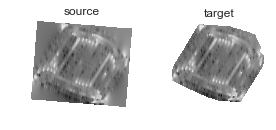

Processing 6090006469 - Found a match with 100.0% overlap:
	Done in 1 m 6 s


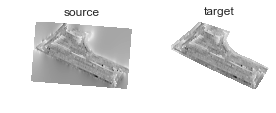

Processing 6090161265 - Found a match with 100.0% overlap:
	Done in 0 m 45 s


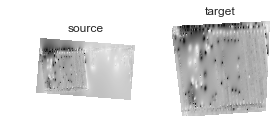

Processing 6090161366 - Found a match with 99.7% overlap:
	Done in 1 m 32 s


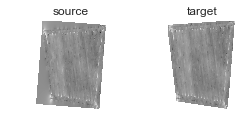

Processing 6090205523 - No sufficiently overlapping match found!
Processing 6090324751 - Found a match with 100.0% overlap:
	Done in 0 m 28 s


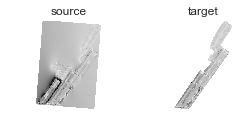

Processing 6090328993 - Found a match with 99.9% overlap:
	Done in 0 m 28 s


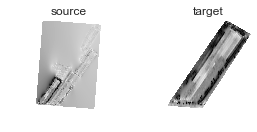

Processing 6090340818 - Found a match with 98.8% overlap:
	Done in 2 m 34 s


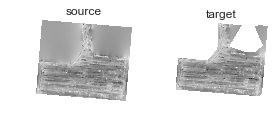

Processing 6090342838 - Found a match with 99.8% overlap:
	Done in 2 m 36 s


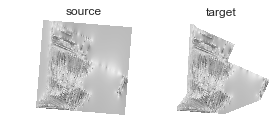

Processing 6090345161 - Found a match with 100.0% overlap:
	Done in 2 m 15 s


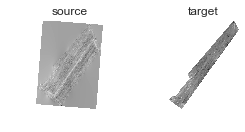

Processing 6090345969 - Found a match with 99.7% overlap:
	Done in 2 m 3 s


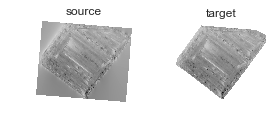

Processing 6090346171 - Found a match with 100.0% overlap:
	Done in 2 m 15 s


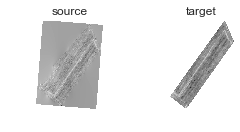

Processing 6090347888 - No sufficiently overlapping match found!
Processing 6090348292 - Found a match with 100.0% overlap:
	Done in 2 m 24 s


Processing 6090672133 - Found a match with 99.9% overlap:
	Done in 0 m 18 s


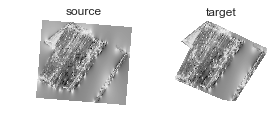

Processing 8860017483 - No sufficiently overlapping match found!
Processing 8860091851 - Found a match with 100.0% overlap:
	Done in 1 m 43 s


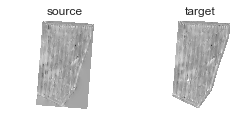

Processing 8860095891 - Found a match with 98.8% overlap:
	Done in 2 m 48 s


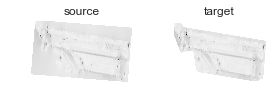

Processing 8860095992 - Found a match with 100.0% overlap:
	Done in 2 m 57 s


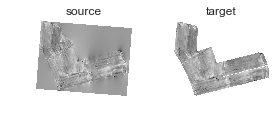

Processing 8860195925 - No sufficiently overlapping match found!
Processing 9880016034 - No sufficiently overlapping match found!
Processing 9880016135 - No sufficiently overlapping match found!
Processing 9880167291 - No sufficiently overlapping match found!
Processing 9880217714 - No sufficiently overlapping match found!
Processing done in 54 m 9 s


In [1]:
from field_analysis.extraction import yields

yields.extract_block_shapes()